In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### P value is the probability value that help us determine if we should accept or reject our hypothesis. While drawing inferences about a population using a sample we often formulate a hypothesis about the population and then use sample data to test this hypothesis. The p-value plays a crucial role in this process. It provides a measure of the strength of evidence against the null hypothesis.

#### Confidence Interval offer a range of plausible values for population parameters, assess precision, provide context for hypothesis testing, support decision-making, and communicate results effectively. They provide a more comprehensive picture of the data, enabling a deeper understanding of the findings.

In [2]:
df = pd.read_csv('people.csv')
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.37,0.52,2,159,3,0,1,0,sales,low
4,0.41,0.50,2,153,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent.company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [5]:
df.describe()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent.company,workAccident,left,promotionInLast5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfactoryLevel      14999 non-null  float64
 1   lastEvaluation         14999 non-null  float64
 2   numberOfProjects       14999 non-null  int64  
 3   avgMonthlyHours        14999 non-null  int64  
 4   timeSpent.company      14999 non-null  int64  
 5   workAccident           14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotionInLast5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.dtypes

satisfactoryLevel        float64
lastEvaluation           float64
numberOfProjects           int64
avgMonthlyHours            int64
timeSpent.company          int64
workAccident               int64
left                       int64
promotionInLast5years      int64
dept                      object
salary                    object
dtype: object

In [8]:
df.describe(include = 'object') # gives the statistical summary of the columns with datatype as object

,dept,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


In [9]:
df.rename(columns ={'timeSpent.company':'timeSpent_company'},inplace = True)

In [10]:
df.columns

Index(['satisfactoryLevel', 'lastEvaluation', 'numberOfProjects',
       'avgMonthlyHours', 'timeSpent_company', 'workAccident', 'left',
       'promotionInLast5years', 'dept', 'salary'],
      dtype='object')

In [11]:
df.isnull().sum()

satisfactoryLevel        0
lastEvaluation           0
numberOfProjects         0
avgMonthlyHours          0
timeSpent_company        0
workAccident             0
left                     0
promotionInLast5years    0
dept                     0
salary                   0
dtype: int64

In [12]:
df.duplicated().sum()

3008

In [13]:
df.drop_duplicates(inplace = True)

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(11991, 10)

#### Q1. Check using test that Statisfactory column is normally distributted or not. 

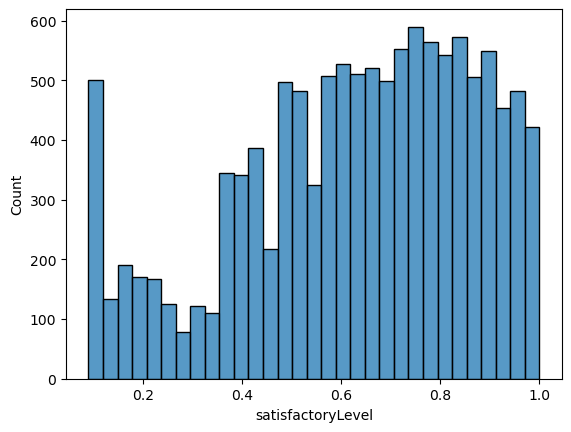

In [16]:
# You can check whether the data is normally distributed or not,
# visually using a Histogram, KDE plot 
# Skewness: Skew function
# Test: Shapiro Wilk Test

sns.histplot(df['satisfactoryLevel'])
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_23784\1551879422.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['satisfactoryLevel'])


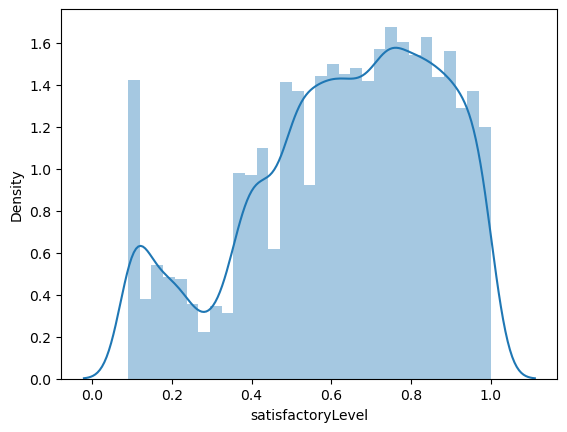

In [17]:
sns.distplot(df['satisfactoryLevel'])
plt.show()

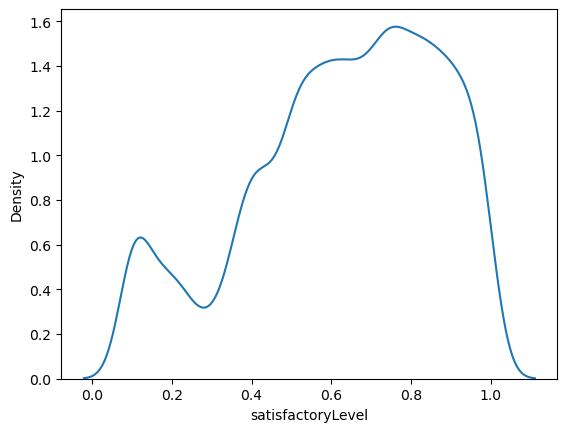

In [18]:
sns.kdeplot(df['satisfactoryLevel'])
plt.show()

In [19]:
# Skewness function: -ve value indicates left-skewed
df['satisfactoryLevel'].skew()

-0.5387016649389459

In [20]:
# Normality Test
# Kshapiro wilk test is similar to Null Hypothesis
from scipy.stats import shapiro

In [21]:
shapiro(df['satisfactoryLevel'])

C:\Users\HP\anaconda3\Lib\site-packages\scipy\stats\_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9526872038841248, pvalue=0.0)

In [22]:
# Since p_value is less than alpha, we reject null hypothessis:'The data in 'Satisaftorylevel' column is normally distributed.

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
le = LabelEncoder()

In [25]:
# df['salary'] = le.fit_transform(df['salary'])
# df['dept'] = le.fit_transform(df['dept'])

In [26]:
# To check what number or label has been assigned to which value in the given column, we can use 'Label Mapping'.
df['dept'] = le.fit_transform(df['dept'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping


{'IT': 0,
 'RandD': 1,
 'accounting': 2,
 'hr': 3,
 'management': 4,
 'marketing': 5,
 'product_mng': 6,
 'sales': 7,
 'support': 8,
 'technical': 9}

In [27]:
df['salary']= le.fit_transform(df['salary'])
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
label_mapping

{'high': 0, 'low': 1, 'medium': 2}

In [28]:
df.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1


<Axes: >

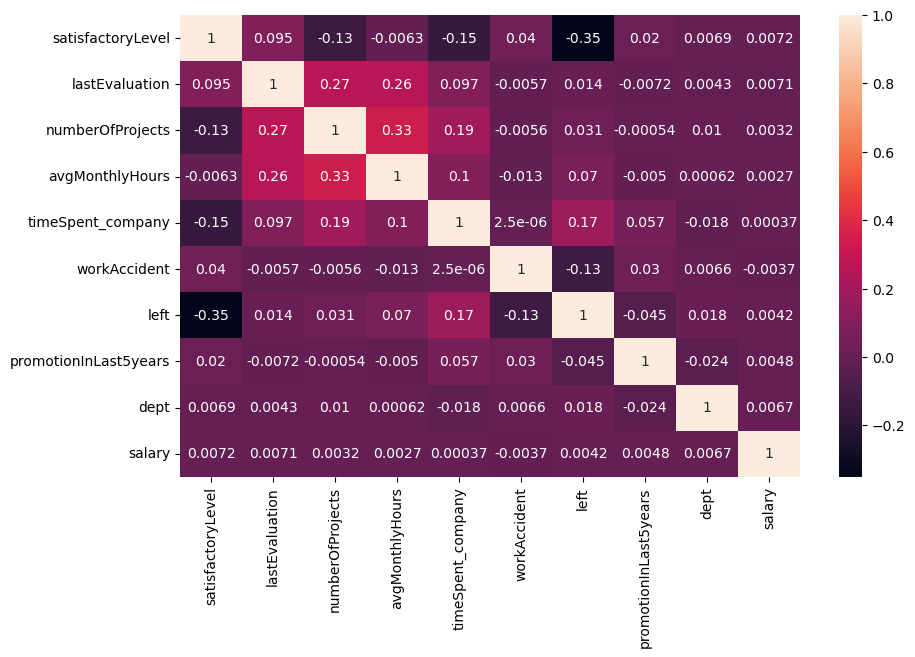

In [30]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(numeric_only = True), annot = True, color= 'Blue')

In [31]:
df['satisfactoryLevel'].corr(df['lastEvaluation'])

0.09518595371704293

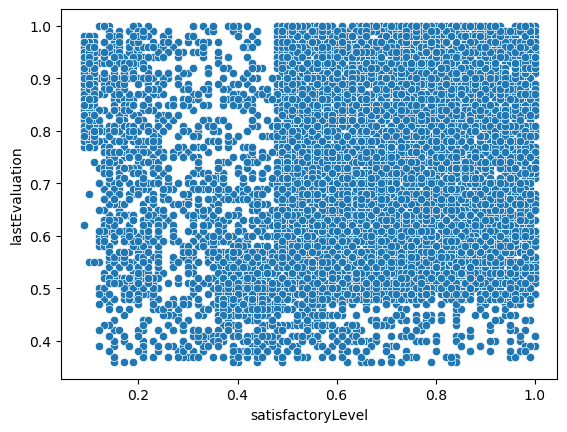

In [32]:
sns.scatterplot(x = 'satisfactoryLevel', y = 'lastEvaluation', data = df)
plt.show()
# In a scatter plot if the two columns are highly positively correlated, you'll see a line passing in upward direction and vice-versa


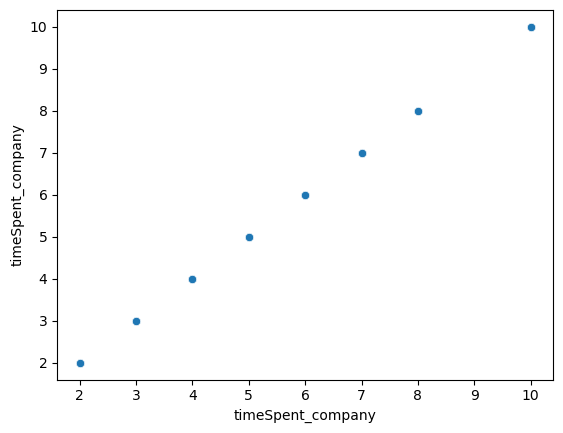

In [33]:
sns.scatterplot(x = 'timeSpent_company', y = 'timeSpent_company', data = df)
plt.show()

In [34]:
# Calculating the 'Attrition Rate'
df['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [35]:
attrit_rate = len(df[df['left']==1])/len(df)*100
attrit_rate

16.604119756484028

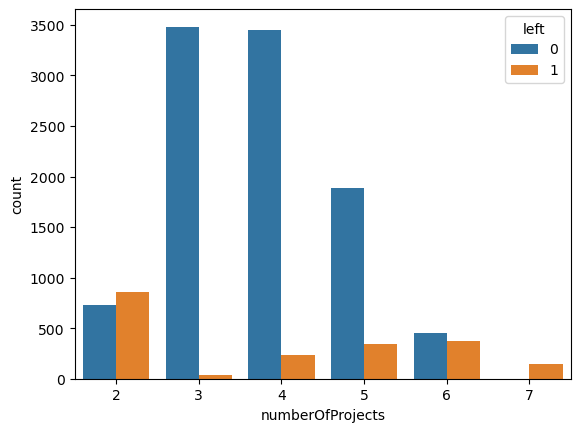

In [36]:
# Calculating how many people left based on the number of projects(assigned/not assigned)
sns.countplot(x= 'numberOfProjects', hue = 'left', data = df)
plt.show()

#### Q2. Create a filter of data when satisfactory level is between 0 to 0.05, and time spend in the company is 2 years and also average monthly hours is in between 130 to 200 hrs

In [37]:
filter1 = df[(df['satisfactoryLevel'] >= 0) & (df['satisfactoryLevel'] <= 0.5) & (df['timeSpent_company'] == 2) & (df['avgMonthlyHours'] >= 130) & (df['avgMonthlyHours'] <= 200)]
filter1

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
35,0.13,0.78,6,152,2,0,1,0,8,1
379,0.48,0.78,2,198,2,0,1,0,9,2
413,0.34,0.67,4,141,2,0,1,0,7,1
1239,0.14,0.47,4,175,2,0,1,0,1,2
1426,0.19,0.58,5,182,2,0,0,0,9,2
...,...,...,...,...,...,...,...,...,...,...
14685,0.39,0.48,3,190,2,0,0,0,9,1
14835,0.50,0.90,4,171,2,0,0,0,3,1
14840,0.13,0.97,3,156,2,0,0,0,8,2
14855,0.45,0.41,3,193,2,1,0,0,7,1


#### 3. In second question check whether The average monthly hours of a employee having 2 years experience is 167. Also check Is it same for employees having more than 2 years experience?

In [48]:
filter1['avgMonthlyHours'].mean()

167.2258064516129

In [51]:
filter2 = df[(df['satisfactoryLevel'] >= 0) & (df['satisfactoryLevel'] <= 0.5) & (df['timeSpent_company'] >2) & (df['avgMonthlyHours'] >= 130) & (df['avgMonthlyHours'] <= 200)]
filter2.shape

(1462, 10)

In [57]:
# Null hypothesis: Means are equal
# Alternative Hypothesis: Means are not equal
sample1 = df.sample(25)

In [58]:
from scipy.stats import ttest_1samp

In [59]:
ttest_1samp(sample1['avgMonthlyHours'], 167)
# Since p_value < alpha, we reject Null hypothesis: Means are equal

TtestResult(statistic=4.0494556163850985, pvalue=0.00046497375710884245, df=24)

In [60]:
filter2['avgMonthlyHours'].mean()

155.54787961696306

#### Q4. The percentage of employee leaving the company is 3% having experience of 2 years. Is it same for employees having more than 2 years experience?

In [65]:
# Null Hypo: The percentage of employee leaving the companyhaving more than 2 years experience is same as employees having experience of 2 years
# Alternate Hypo: The percentage of employee leaving the companyhaving more than 2 years experience is same as employees having experience of 2 years

In [91]:
from statsmodels.stats.proportion import proportions_ztest

In [92]:
sample2 = filter2.sample(100)

In [93]:
count = sample2['left'].value_counts
count()

left
0    54
1    46
Name: count, dtype: int64

In [97]:
nobs = len(sample2) # sample2.shape[0]
nobs

100

In [98]:
value = 0.03

In [103]:
z_statistic, p_value = proportions_ztest(count=count(), nobs=nobs , value=value)
z_statistic, p_value

(0.7071067811865478, 0.47950012218695326)

In [ ]:
# Since p_value is > alpha we fail to reject null hypo: The percentage of employee leaving the companyhaving more than 2 years experience is same as employees having experience of 2 years

#### Q5. Is the mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 -10 yrs ?

In [104]:
df['timeSpent_company'].unique()

array([ 3,  6,  4,  5,  2,  8, 10,  7], dtype=int64)

In [107]:
filter3 = df[(df['timeSpent_company']>=2) & (df['timeSpent_company']<=5)]
filter3.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.37,0.52,2,159,3,0,1,0,7,1
4,0.41,0.50,2,153,3,0,1,0,7,1
5,0.10,0.77,6,247,4,0,1,0,7,1


In [108]:
filter4 = df[(df['timeSpent_company']>=6) & (df['timeSpent_company']<=10)]
filter4.head()

,satisfactoryLevel,lastEvaluation,numberOfProjects,avgMonthlyHours,timeSpent_company,workAccident,left,promotionInLast5years,dept,salary
1,0.80,0.86,5,262,6,0,1,0,7,2
13,0.78,0.99,4,255,6,0,1,0,7,1
26,0.84,0.87,4,246,6,0,1,0,3,1
33,0.57,0.70,3,273,6,0,1,0,8,1
63,0.90,1.00,5,221,6,0,1,0,7,2


In [109]:
sample3 = filter3.sample(30)
sample4 = filter4.sample(30)

In [110]:
sample3.shape, sample4.shape

((30, 10), (30, 10))

In [ ]:
# Null Hypo:  mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 -10 yrs
# Alternate hypo:  mean avg monthly hours of a employee having experience of 2-5 yrs is not the same as that for employee having exp 6 -10 yrs

In [111]:
from scipy.stats import ttest_ind

In [112]:
t_statistic, p_value = stats.ttest_ind(sample3['avgMonthlyHours'], sample4['avgMonthlyHours'])
t_statistic, p_value

(-0.30044235372434785, 0.7649140510901331)

In [ ]:
# Since p_value is > alpha, we fail to reject null hypo--> mean avg monthly hours of a employee having experience of 2-5 yrs is the same as that for employee having exp 6 -10 yrs

In [113]:
filter3['avgMonthlyHours'].mean()


200.14453299901496

In [114]:
filter4['avgMonthlyHours'].mean()

204.93203883495147